In [2]:
import pandas as pd
data=pd.read_csv("WineQuality.csv")
data=data.dropna()
data["Type"][data["Type"] == "white"] = 1
data["Type"][data["Type"] == "White Wine"] = 1
data["Type"][data["Type"] == "red"] = 0
data["Type"][data["Type"] == "Red Wine"] = 0

C:\Users\hp\AppData\Local\Temp\ipykernel_26100\72386507.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "White Wine"] = 1
C:\Users\hp\AppData\Local\Temp\ipykernel_26100\72386507.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] == "red"] = 0
C:\Users\hp\AppData\Local\Temp\ipykernel_26100\72386507.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Type"][data["Type"] ==

In [3]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset

# Separate the target variable (if applicable)
X = data.drop(columns=['quality'])  # Remove the target column if you have one

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Separate the target variable (if applicable)
X = data.drop(columns=['quality'])  # Remove the target column if you have one

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Create a PCA instance with the desired number of components
n_components = 2  # Adjust this as needed
pca = PCA(n_components=n_components)

# Fit PCA to the standardized data and transform it
X_pca = pca.fit_transform(X_scaled)


In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load your wine quality dataset (replace 'wine_dataset.csv' with your dataset file)


# Define features (X) and target (y)
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score, classification_report,roc_curve, auc, confusion_matrix
from sklearn.preprocessing import label_binarize
from itertools import cycle


d =  DecisionTreeClassifier(random_state=66) 

# a list of dictionaries to specify the parameters that we'd want to tune
criterion = ['gini', 'entropy', 'log_loss']
splitter = ['best','random']
max_depth = [2,4,6,8,10,12] 
min_samples_leaf = [2, 3, 5]
class_weight = ['balanced', None] 

param_grid =\
    [{ 'class_weight': class_weight
      ,'criterion': criterion
      ,'splitter': splitter
      ,'max_depth': max_depth
      ,'min_samples_leaf': min_samples_leaf
      ,'max_features':[1,2,3,4,5,6,7,8,9,10,11,12,13,14]
}]

gs = GridSearchCV(estimator=d, param_grid=param_grid, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
gs.fit(X_train,y_train)
l=gs.best_estimator_
y_pred_test=l.predict(X_test)
y_pred_train=l.predict(X_train)

results = accuracy_score(y_test, y_pred_test)
print(f'Accuracy: {results:.2f}')
cv_scores = cross_val_score(l, X, y, cv=5)  

print('Cross-Validation Scores:', cv_scores)
print('Mean Accuracy: {:.2f}'.format(cv_scores.mean()))
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

rmse_train = np.sqrt(mse_train)
rmse_test = np.sqrt(mse_test)

r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

classification_report_test = classification_report(y_test, y_pred_test,zero_division=1)

# Print the evaluation metrics
print("Training MSE:", mse_train)
print("Testing MSE:", mse_test)

print("Training RMSE:", rmse_train)
print("Testing RMSE:", rmse_test)

print("Training R2 Score:", r2_train)
print("Testing R2 Score:", r2_test)

print("Training MAE:", mae_train)
print("Testing MAE:", mae_test)

print("Training Accuracy:", accuracy_train)
print("Testing Accuracy:", accuracy_test)

print("Classification Report (Testing Data):\n", classification_report_test)
y_test_bin = label_binarize(y_test, classes=np.unique(y))
n_classes = y_test_bin.shape[1]

Fitting 5 folds for each of 3024 candidates, totalling 15120 fits
Accuracy: 0.82
Cross-Validation Scores: [0.80603338 0.81899872 0.80179718 0.81178585 0.83207087]
Mean Accuracy: 0.81
Training MSE: 0.2167982540599525
Testing MSE: 0.24069319640564826
Training RMSE: 0.46561599420547456
Testing RMSE: 0.49060492904744474
Training R2 Score: 0.7162363461563049
Testing R2 Score: 0.6795114351087919
Training MAE: 0.1801463508569228
Testing MAE: 0.20038510911424903
Training Accuracy: 0.8367032543808973
Testing Accuracy: 0.8177150192554558
Classification Report (Testing Data):
               precision    recall  f1-score   support

           3       0.86      0.77      0.81        31
           4       0.95      0.82      0.88       253
           5       0.85      0.86      0.85      2603
           6       0.81      0.83      0.82      3368
           7       0.76      0.75      0.76      1314
           8       0.88      0.62      0.73       216
           9       1.00      0.00      0.00     

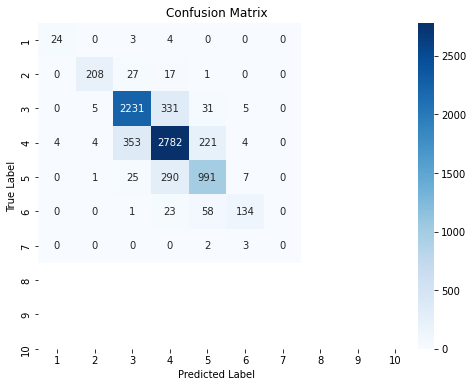

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split



# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred_test)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(1, 11), yticklabels=range(1, 11))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

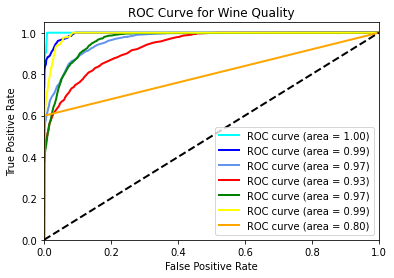

In [7]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(7):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], l.predict_proba(X_test)[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

plt.figure()
colors = cycle(['aqua', 'blue', 'cornflowerblue','red','green','yellow','orange'])
for i, color in zip(range(7), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve (area = %0.2f)' % roc_auc[i])

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Wine Quality')
plt.legend(loc="lower right")
plt.show()